In [2]:
## 1 Getting the Data Ready
## 2 Choosing Machine learning Model
## 3 Fit Model
## 4 Evaluate Model
## 5 Improve Model
## 6 Saving the Models 
## 7 Summary

In [3]:
import pandas as pd

In [4]:
heart_disease =pd.read_csv('heart_disease_uci.csv')
heart_disease.dropna(inplace=True)
heart_disease

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [5]:
# Create X
X = heart_disease.drop('num',axis=1)
X

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect


In [6]:
# create Y
Y =heart_disease['num']
Y

0      0
1      2
2      1
3      0
4      0
      ..
299    2
300    3
301    1
508    1
748    1
Name: num, Length: 299, dtype: int64

In [7]:
## 2 Choosing Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
## 3 Fit Model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train ,Y_test = train_test_split(X,Y,test_size=0.3)

In [9]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [10]:
## 4 Evaluate Model
predicted_y =clf.predict(X_test)
predicted_y

array([0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 3, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 3, 0, 0, 3, 1, 3, 3, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 0,
       1, 0])

In [11]:
clf.score(X_train,Y_train)

1.0

In [12]:
clf.score(X_test,Y_test)

0.5666666666666667

In [13]:
## 5 Improve Model
for i in range(10,200,10):
    print(f'Running Model with {i} estimators ')
    clf = RandomForestClassifier(n_estimators=190).fit(X_train,Y_train)
    print(f'Accuracy is :{clf.score(X_test,Y_test)}')
    
   

Running Model with 10 estimators 
Accuracy is :0.5666666666666667
Running Model with 20 estimators 
Accuracy is :0.5666666666666667
Running Model with 30 estimators 
Accuracy is :0.5888888888888889
Running Model with 40 estimators 
Accuracy is :0.5777777777777777
Running Model with 50 estimators 
Accuracy is :0.5555555555555556
Running Model with 60 estimators 
Accuracy is :0.5666666666666667
Running Model with 70 estimators 
Accuracy is :0.5666666666666667
Running Model with 80 estimators 
Accuracy is :0.5555555555555556
Running Model with 90 estimators 
Accuracy is :0.5666666666666667
Running Model with 100 estimators 
Accuracy is :0.5777777777777777
Running Model with 110 estimators 
Accuracy is :0.5666666666666667
Running Model with 120 estimators 
Accuracy is :0.5888888888888889
Running Model with 130 estimators 
Accuracy is :0.5777777777777777
Running Model with 140 estimators 
Accuracy is :0.5666666666666667
Running Model with 150 estimators 
Accuracy is :0.5777777777777777
Runn

In [14]:
# Save model
import pickle

pickle.dump(clf,open('Heart Disease Predictor.pkl','wb'))

In [15]:
load_model = pickle.load(open('Heart Disease Predictor.pkl','rb'))
load_model.score(X_test,Y_test)

0.5777777777777777

In [16]:
sklearn_steps = [
 '1 Getting the Data Ready',
 '2 Choosing Machine learning Model',
 '3 Fit Model',
 '4 Evaluate Model',
 '5 Improve Model',
 '6 Saving the Models', 
 '7 Summary',
]


In [17]:
sklearn_steps

['1 Getting the Data Ready',
 '2 Choosing Machine learning Model',
 '3 Fit Model',
 '4 Evaluate Model',
 '5 Improve Model',
 '6 Saving the Models',
 '7 Summary']

# 1 Getting the Data Ready
## 1.1 Splitdata into features and label,(independent vs dependent variable), X,Y
## 1.2 Filling the missing values
## 1.3 Converting data types

In [18]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [19]:
heart_disease = pd.read_csv('heart_disease_uci.csv')
heart_disease.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
X = heart_disease.drop('num', axis=1)

In [21]:
Y = heart_disease['num']

In [22]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [23]:
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25) # X is independent and Y is  dependent  

In [25]:
len(heart_disease)

920

In [26]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((690, 15), (230, 15), (690,), (230,))

In [27]:
X_train.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
dtype: object

In [28]:
phone_data = pd.read_csv('smartphones.csv')
phone_data

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,$231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,$279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,$179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,$279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,$799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,$249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,$200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,$269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,$211.00


In [29]:
phone_data.dtypes

Smartphone      object
Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price     object
dtype: object

In [30]:
phone_data['Final Price'] = phone_data['Final Price'].str.replace(r'[\$\,\.]','',regex=True)
phone_data['Final Price'] = phone_data['Final Price'].str[:3].astype(int)
phone_data

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211


In [31]:
phone_data.dtypes

Smartphone      object
Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price      int64
dtype: object

In [32]:
# Split
X = phone_data.drop('Final Price', axis=1)
Y = phone_data['Final Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)
X,Y

(                                            Smartphone     Brand  \
 0                   Realme C55 8/256GB Sunshower Libre    Realme   
 1             Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
 2         Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
 3             Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
 4              Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
 ...                                                ...       ...   
 1811             Xiaomi Redmi Note 8 4/64GB Azul Libre    Xiaomi   
 1812   Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre    Xiaomi   
 1813          Xiaomi Redmi Note 9 4/128GB Blanco Libre    Xiaomi   
 1814   Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre    Xiaomi   
 1815  Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre    Xiaomi   
 
                Model   RAM  Storage   Color Free  
 0                C55   8.0    256.0  Yellow  Yes  
 1         Galaxy M23   4.0    128.0    Blue  Yes  
 2           M

In [33]:
# Build ML model we got error because there is many data type issue only int data work on ML
from sklearn.ensemble import RandomForestRegressor

phone_model = RandomForestRegressor()
phone_model.fit(X_train,Y_train)
phone_model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Samsung Galaxy M33 5G 6/128GB Verde Libre'

In [34]:
from sklearn.preprocessing import OneHotEncoder  # easy way and shortest wasy
from sklearn.compose import ColumnTransformer

features_cat = ['Smartphone','Brand','Model','Color','Free']
hottie = OneHotEncoder()
transformer = ColumnTransformer([('One_hotti',hottie,features_cat)],
                                remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X)
import pandas as pd
transformed_X_dense = transformed_X.toarray()   # Convert to dense array
pd.DataFrame(transformed_X_dense)   # Convert to DataFrame

,0,1,2,3,4,5,6,7,8,9,...,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,256.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,128.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,128.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,128.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,64.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,128.0
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,128.0
1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,64.0


In [35]:
from sklearn.preprocessing import OneHotEncoder  # lenthy way and confusing also
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Reduce categories for high-cardinality features
X['Model'] = X['Model'].apply(lambda x: x if X['Model'].value_counts()[x] > 10 else 'Other')

# Step 2: Define categorical features
features_cat = ['Smartphone','Brand', 'Model', 'Color', 'Free']

# Step 3: Apply one-hot encoding (with sparse=True to save memory if needed)
hottie = OneHotEncoder()
transformer = ColumnTransformer([('One_hotti', hottie, features_cat)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)

# Step 4: Generate column names and create DataFrame
encoded_columns = transformer.named_transformers_['One_hotti'].get_feature_names_out(features_cat)
remaining_columns = list(X.drop(columns=features_cat).columns)
all_columns = list(encoded_columns) + remaining_columns

df_transformed_X = pd.DataFrame(transformed_X.toarray(), columns=all_columns)  # Use .toarray() for sparse matrix
print(df_transformed_X.shape)
print(df_transformed_X.head())


(1816, 1912)
   Smartphone_ASUS ZenFone 9 5G 8/128GB Negro Medianoche Libre  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Smartphone_Alcatel 1 (2021) 1/16GB Azul Libre  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Smartphone_Alcatel 1 (2021) 1/16GB Negro Libre  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4           

# Getting Data Second Method of Conversion

In [36]:
transformed_new = pd.get_dummies(phone_data[['Smartphone','Brand', 'Model', 'Color', 'Free']], dtype=int)
transformed_new

,Smartphone_ASUS ZenFone 9 5G 8/128GB Negro Medianoche Libre,Smartphone_Alcatel 1 (2021) 1/16GB Azul Libre,Smartphone_Alcatel 1 (2021) 1/16GB Negro Libre,Smartphone_Alcatel 1B 2/32GB Negro Libre,Smartphone_Alcatel 1B 2022 2/32GB Azul Libre,Smartphone_Alcatel 1B 2022 2/32GB Negro Libre,Smartphone_Alcatel 1SE 2021 6/64GB Gris Libre,Smartphone_Alcatel 1SE 2021 6/64GB Verde Libre,Smartphone_Apple iPhone 11 128GB (PRODUCT)RED Libre,Smartphone_Apple iPhone 11 128GB Amarillo Libre,...,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow,Free_No,Free_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Lets refit the model
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X_dense,Y,test_size=0.2)
phone_model.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
phone_model.score(X_test,Y_test)

0.4247714280674042

In [39]:
phone_missing_values = pd.read_csv('phone_data_missing_values.csv')
phone_missing_values

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043.0,4,$400.00
1,Samsung,Red,87899.0,4,$500.00
2,Nokia,NaN,NaN,3,NaN
3,iPhone,Black,11179.0,5,$220.00
4,Motorolla,White,213095.0,4,$350.00
5,Nokia,NaN,NaN,4,NaN
6,Samsung,Blue,45698.0,4,$750.00
7,Samsung,Blue,NaN,4,$700.00
8,NaN,White,60000.0,4,$625.00
9,Motorolla,White,31600.0,4,$970.00


In [40]:
phone_missing_values.isna().sum()

Make          1
Colour        2
Memory(kb)    3
Sim Cards     0
Price         2
dtype: int64

In [41]:
X = phone_missing_values.drop('Price', axis=1)
Y = phone_missing_values['Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)
X,Y

from sklearn.preprocessing import OneHotEncoder  # easy way and shortest wasy
from sklearn.compose import ColumnTransformer

features_cat = ['Make','Colour','Sim Cards','Memory(kb)']
hottie = OneHotEncoder()
transformer = ColumnTransformer([('One_hotti',hottie,features_cat)],
                                remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X)
import pandas as pd
transformed_X_dense = transformed_X.toarray()   # Convert to dense array
pd.DataFrame(transformed_X_dense)   # Convert to DataFrame

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Fill NAN of Make Column
phone_missing_values['Make'].fillna('missing')
# Fill NAN of Colour Column
phone_missing_values['Colour'].fillna('missing')
# Fill NAN of Memory(kb) Column
phone_missing_values['Memory(kb)'].fillna(phone_missing_values['Memory(kb)'].mean())
# Fill NAN of Price Column


0    150043.000000
1     87899.000000
2     85644.857143
3     11179.000000
4    213095.000000
5     85644.857143
6     45698.000000
7     85644.857143
8     60000.000000
9     31600.000000
Name: Memory(kb), dtype: float64

In [43]:
phone_missing_values.isna().sum()

Make          1
Colour        2
Memory(kb)    3
Sim Cards     0
Price         2
dtype: int64

In [44]:
phone_missing_values.dropna(inplace=True)

In [45]:

phone_missing_values.isna().sum()
# now there is no nan value 


Make          0
Colour        0
Memory(kb)    0
Sim Cards     0
Price         0
dtype: int64

# 2nd Method fill na values using sklearn

In [46]:
phone_data_missing = pd.read_csv('phone_data_missing_values.csv')
phone_data_missing

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,White,150043.0,4,$400.00
1,Samsung,Red,87899.0,4,$500.00
2,Nokia,NaN,NaN,3,NaN
3,iPhone,Black,11179.0,5,$220.00
4,Motorolla,White,213095.0,4,$350.00
5,Nokia,NaN,NaN,4,NaN
6,Samsung,Blue,45698.0,4,$750.00
7,Samsung,Blue,NaN,4,$700.00
8,NaN,White,60000.0,4,$625.00
9,Motorolla,White,31600.0,4,$970.00


In [47]:
phone_data_missing.isna().sum()

Make          1
Colour        2
Memory(kb)    3
Sim Cards     0
Price         2
dtype: int64

In [48]:
phone_data_missing.dropna(subset=['Price'],inplace=True)
phone_data_missing.isna().sum()

Make          1
Colour        0
Memory(kb)    1
Sim Cards     0
Price         0
dtype: int64

In [49]:
# Spilt X and Y 
X = phone_data_missing.drop('Price', axis=1)
Y = phone_data_missing['Price']

In [50]:
# imputation
#filling data with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill categorical values with missing and Numerical Values with mean

Cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
Simcards_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer =SimpleImputer(strategy='mean')

#define Columns
Cat_feature = ['Make','Colour']
Simcards_feature =['Sim Cards']
num_feature = ['Memory(kb)']

imputer = ColumnTransformer([('Cat_feature',Cat_imputer,Cat_feature),
                              ('Simcards_feature',Simcards_imputer,Simcards_feature),
                              ('num_feature',num_imputer,num_feature)])

filled_X = imputer.fit_transform(X)
filled_X

array([['Nokia', 'White', 4, 150043.0],
       ['Samsung', 'Red', 4, 87899.0],
       ['iPhone', 'Black', 5, 11179.0],
       ['Motorolla', 'White', 4, 213095.0],
       ['Samsung', 'Blue', 4, 45698.0],
       ['Samsung', 'Blue', 4, 85644.85714285714],
       ['missing', 'White', 4, 60000.0],
       ['Motorolla', 'White', 4, 31600.0]], dtype=object)

In [51]:
phone_data_filled = pd.DataFrame(filled_X,columns=['Make','Colour','Memory(kb)','Sim Cards'])

In [52]:
phone_data_filled

,Make,Colour,Memory(kb),Sim Cards
0,Nokia,White,4,150043.0
1,Samsung,Red,4,87899.0
2,iPhone,Black,5,11179.0
3,Motorolla,White,4,213095.0
4,Samsung,Blue,4,45698.0
5,Samsung,Blue,4,85644.857143
6,missing,White,4,60000.0
7,Motorolla,White,4,31600.0


# picking up model for regression problem

# Importing data, fetch_california_housing 

In [53]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [54]:
df_housing = pd.DataFrame(housing['data'],columns=housing['feature_names'])
df_housing['target'] = pd.Series(housing['target'])
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
# data length 
len(df_housing)

20640

# Lets try Ridge regression model

In [56]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import train_test_split
# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

X = df_housing.drop('target',axis=1)
Y = df_housing['target']
# Split into test and Train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20)
# Instatiate Ridge model
reg_model = Ridge()
reg_model.fit(X_train,Y_train)
# Check the score of the model
reg_model.score(X_test,Y_test)

0.5965957761160752

# Lets try RandomForestRegressor model for more accurate result

In [57]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

X = df_housing.drop('target',axis=1)
Y = df_housing['target']
# Split into test and Train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20)
# Instatiate RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)
# Check the score of the model
rf_model.score(X_test,Y_test)

0.8069911860615194

# Choosing Estimator for classification problem

In [58]:
heart_disease = pd.read_csv('heart_disease_uci.csv')
heart_disease.dropna(inplace=True)
heart_disease.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [59]:
len(heart_disease)

299

In [60]:
# we imported Linear SVC model
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

X = heart_disease.drop('num',axis=1)
Y = heart_disease['num']
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])
# Split into test and Train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20)
# Instatiate LinearSVC model
SVC_model = LinearSVC()
SVC_model.fit(X_train,Y_train)
# Check the score of the model
SVC_model.score(X_test,Y_test)

0.65

In [61]:
# We imported Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

X = heart_disease.drop('num',axis=1)
Y = heart_disease['num']
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])
# Split into test and Train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20)
# Instatiate linear regressor classifiers model
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train,Y_train)
# Check the score of the model
RFC_model.score(X_test,Y_test)

0.6666666666666666

# 1 Structured Data use ensemble Method
# 2 Unstructured Data use Deep learning

## Fit the Model

In [62]:
# 2 wat we can run the prediction
# 1 predict()
# 2 predict_proba()

In [63]:
heart_disease = pd.read_csv('heart_disease_uci.csv')
heart_disease.dropna(inplace=True)
heart_disease.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [64]:
X = heart_disease.drop('num',axis=1)
y = heart_disease['num']

In [65]:
# choosing Ml model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [66]:
# Split data into test and train
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [67]:
# Evaluating Model
y_predicted = clf.predict(X_test)
y_predicted  # predicted values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0])

In [68]:
np.array(y_test) # ground reality

array([0, 0, 4, 2, 0, 1, 0, 3, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 4, 1, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0])

In [69]:
np.mean(y_predicted == y_test) # method 1

np.float64(0.5666666666666667)

In [70]:
clf.score(X_test,y_test) # method 2

0.5666666666666667

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted) # method 3

0.5666666666666667

In [72]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# predict_proba()

In [73]:
clf.predict(X_test)[:5]

array([0, 0, 1, 0, 0])

In [74]:
# dominat work  predict proba show the individual result or other word probability show the which one has bettter result
# also the the percentage of the results 1st col target = 0 2nd col is target = 1
clf.predict_proba(X_test)[:5] 


array([[0.84, 0.12, 0.01, 0.03, 0.  ],
       [0.54, 0.24, 0.09, 0.1 , 0.03],
       [0.19, 0.28, 0.22, 0.21, 0.1 ],
       [0.48, 0.12, 0.08, 0.29, 0.03],
       [0.75, 0.05, 0.09, 0.04, 0.07]])

# Making Prediction on regression problem

In [75]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [76]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
from sklearn.ensemble import RandomForestRegressor

# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

# Create data
X = df_housing.drop('target',axis=1)
y = df_housing['target']

# Split into test and Train
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20)

# Instatiate RandomForestRegressor model
Regression_model = RandomForestRegressor().fit(X_train,y_train)

# CMake prediction
predicted_y = Regression_model.predict(X_test)

In [78]:
predicted_y[:5] # predicted value

array([3.5471109, 0.63191  , 2.35045  , 1.2874   , 2.8893303])

In [79]:
np.array(y_test[:5]) # ground reailty

array([3.55 , 0.707, 2.294, 1.125, 2.254])

In [80]:
# Compare the prediction with ground reality
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted_y)

np.float64(0.32635206574612424)

# Evaluating machine learning Models
## Three ways to evaluate sklearn Models/estimator
### 1-Estimator 'Score' Methods
### 2-The scoring Parameters
### 3-Problem-specific metric Function

In [81]:
# choosing Ml model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

X = heart_disease.drop('num',axis=1)
y = heart_disease['num']

from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier().fit(X_train, y_train)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
clf.score(X_train,y_train) # can only run this after fitting the model

1.0

In [83]:
clf.score(X_test,y_test) # can only run this after fitting the model

0.6666666666666666

In [84]:
# lets apply on regression problem

In [85]:
from sklearn.ensemble import RandomForestRegressor

# To reproduce  same resulty for fello ML Scientist
np.random.seed(1)

# Create data
X = df_housing.drop('target',axis=1)
y = df_housing['target']

# Split into test and Train
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

# Instatiate model and fir
Regression_model = RandomForestRegressor().fit(X_train,y_train)

# CMake prediction
Regression_model.score(X_test,y_test)

0.8069911860615194

In [86]:


from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

X = heart_disease.drop('num',axis=1)
y = heart_disease['num']

from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier().fit(X_train, y_train)


In [87]:
clf.score(X_test,y_test) # noraml score method

0.6666666666666666

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.6       , 0.63333333, 0.53333333, 0.53333333, 0.57627119])

In [89]:
clf.score(X_test,y_test),np.mean(cross_val_score(clf,X,y,cv=5))

(0.6666666666666666, np.float64(0.5954802259887007))

# Classification Model Evaluation

# 1 Accuracy
# 2 Area Under the Curve ROC
# 3 Confusion Matrix
# 4 Classification Report

# Accuracy

In [90]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(4)
# Create data
X = heart_disease.drop('num',axis=1)
y = heart_disease['num']

from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier().fit(X_train, y_train)


In [91]:
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.55      , 0.58333333, 0.56666667, 0.55      , 0.57627119])

In [92]:
np.mean(cross_val_score(clf,X,y,cv=5))

np.float64(0.5887570621468927)

In [93]:
print(f'Heart Disease Cross Validation:{np.mean(cross_val_score(clf,X,y,cv=5))*100:.2f}%')

Heart Disease Cross Validation:55.84%


# 2 Area Under the Curve (AUC)
# 2 Reciever Operating Characteristic Cureve(ROC) 

In [94]:
# Create test train data

from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

# fit the model
clf.fit(X_train,y_train)

# Make predictions Using Predict_proba()
y_proba = clf.predict_proba(X_test)


In [95]:
# Extract unique classes from y_test
classes = np.unique(y_test)

# Binarize labels
y_test_binary = label_binarize(y_test, classes=classes)

print(y_test_binary)

[[0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [96]:
y_test_binary = label_binarize(y_test, classes=classes)
for i in range(y_test_binary.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_proba[:, i])

In [97]:
y_proba_positive = y_proba[:,1]
y_proba_positive

array([0.08, 0.13, 0.22, 0.28, 0.11, 0.22, 0.14, 0.21, 0.34, 0.33, 0.34,
       0.04, 0.28, 0.18, 0.34, 0.31, 0.16, 0.04, 0.19, 0.23, 0.33, 0.23,
       0.06, 0.09, 0.16, 0.06, 0.25, 0.19, 0.26, 0.17, 0.27, 0.18, 0.1 ,
       0.34, 0.16, 0.18, 0.39, 0.15, 0.07, 0.24, 0.08, 0.08, 0.26, 0.12,
       0.28, 0.28, 0.14, 0.17, 0.03, 0.03, 0.  , 0.47, 0.14, 0.11, 0.12,
       0.18, 0.04, 0.18, 0.18, 0.15])

In [98]:
# Case 1 : True Positive :  Truth = 1 and Model = 1
# case 2 : False Positive : Truth = 0 and Model = 1
# case 3 : True Negative :  Truth = 0 and Model = 0
# case 4 : Fasle Negative : Truth = 1 and Model = 0


In [99]:
# Calculate  fpr,tpr, threshold
#fpr,tpr, threshold = roc_curve(y_test,y_proba_positive)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive, pos_label=1)

In [100]:
fpr, tpr, thresholds

(array([0.        , 0.01923077, 0.03846154, 0.11538462, 0.13461538,
        0.13461538, 0.19230769, 0.19230769, 0.23076923, 0.26923077,
        0.28846154, 0.32692308, 0.34615385, 0.38461538, 0.5       ,
        0.53846154, 0.59615385, 0.63461538, 0.67307692, 0.69230769,
        0.76923077, 0.80769231, 0.84615385, 0.86538462, 0.90384615,
        0.94230769, 0.98076923, 1.        ]),
 array([0.   , 0.   , 0.   , 0.   , 0.125, 0.25 , 0.375, 0.5  , 0.5  ,
        0.5  , 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625,
        0.75 , 0.75 , 0.75 , 0.75 , 0.875, 0.875, 0.875, 1.   , 1.   ,
        1.   ]),
 array([ inf, 0.47, 0.39, 0.34, 0.33, 0.31, 0.28, 0.27, 0.26, 0.24, 0.23,
        0.22, 0.21, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.11, 0.09,
        0.08, 0.07, 0.06, 0.04, 0.03, 0.  ]))

In [101]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_proba = clf.predict_proba(X_test)

# Binarize labels and calculate ROC for each class
classes = np.unique(y_test)
y_test_binary = label_binarize(y_test, classes=classes)

for i, class_label in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_proba[:, i])
   
# Calculate ROC for a specific positive class (e.g., class 1)
y_proba_positive = y_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive, pos_label=1)

In [102]:
fpr, tpr, thresholds

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.06122449,
        0.14285714, 0.14285714, 0.18367347, 0.2244898 , 0.2244898 ,
        0.32653061, 0.34693878, 0.42857143, 0.51020408, 0.53061224,
        0.59183673, 0.63265306, 0.65306122, 0.71428571, 0.73469388,
        0.79591837, 0.79591837, 0.81632653, 0.93877551, 0.95918367,
        1.        ]),
 array([0.        , 0.        , 0.        , 0.09090909, 0.27272727,
        0.27272727, 0.36363636, 0.54545455, 0.54545455, 0.63636364,
        0.72727273, 0.72727273, 0.72727273, 0.81818182, 0.81818182,
        0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.90909091, 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([ inf, 0.61, 0.4 , 0.38, 0.33, 0.31, 0.29, 0.27, 0.25, 0.24, 0.23,
        0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.13, 0.12, 0.1 ,
        0.09, 0.07, 0.05, 0.  ]))

In [103]:
fpr

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.06122449,
       0.14285714, 0.14285714, 0.18367347, 0.2244898 , 0.2244898 ,
       0.32653061, 0.34693878, 0.42857143, 0.51020408, 0.53061224,
       0.59183673, 0.63265306, 0.65306122, 0.71428571, 0.73469388,
       0.79591837, 0.79591837, 0.81632653, 0.93877551, 0.95918367,
       1.        ])

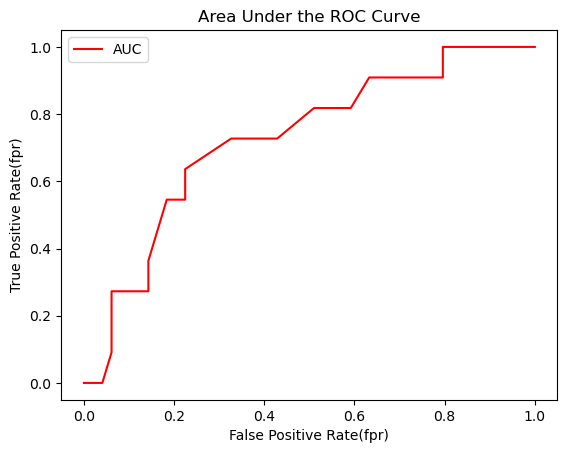

In [104]:
# create a function for plotting using matplot Lib
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):

    #plot roc curve
    plt.plot(fpr,tpr, color='red' , label='AUC')

    # Customize  the plot
    plt.title('Area Under the ROC Curve')
    plt.xlabel('False Positive Rate(fpr)')
    plt.ylabel('True Positive Rate(fpr)')
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr) 

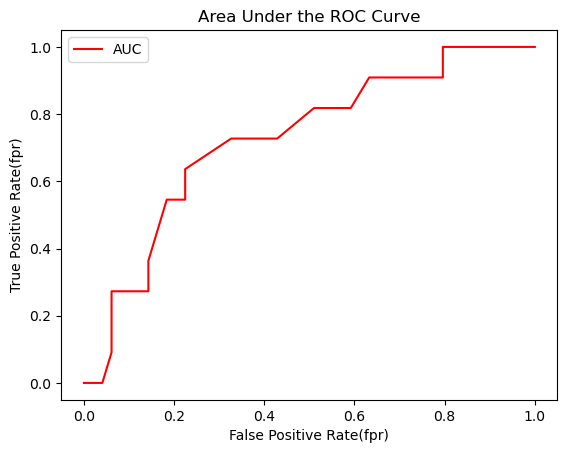

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive, pos_label=1)
plot_roc(fpr,tpr)

In [119]:
y_proba_positive=np.array([0.07, 0.18, 0.2 , 0.12, 0.2])
y_test=np.array([0, 0, 2, 0, 0])

In [120]:
# Compute AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_proba_positive, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.875


In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_positive, multi_class='ovr')

np.float64(0.875)

# 3 Confusion Matrix

In [166]:
# Confusion matrix tell where your model is confused or has lost its mind

## Case 1 Yes  : True Positive :  Truth = 1 and Model = 1 : Model got it Right
## case 2 Opps : False Positive : Truth = 0 and Model = 1 : Model lost its mind
## case 3 Yes  : True Negative :  Truth = 0 and Model = 0 :  Model got it right
## case 4 Opps : Fasle Negative : Truth = 1 and Model=  0 :  Model lost its mind


In [123]:
thresholds = np.full((60,), 0.5)  # Create an array of length 60 with a threshold of 0.5
y_proba_positive = (clf.predict_proba(X_test)[:, 1] > thresholds).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_test), len(y_test))  # These lengths should match

60 60


In [124]:
print(len(clf.predict_proba(X_test)[:, 1]), len(thresholds))

60 60


In [125]:
print(len(y_test), len(X_test))

60 60


In [126]:
print(len(clf.predict(X_test)), len(y_test))

60 60


In [127]:
from sklearn.metrics import confusion_matrix

y_proba_positive = clf.predict(X_test)
confusion_matrix(y_test,y_proba_positive)

array([[35,  0,  0,  0,  0],
       [ 0, 12,  1,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  1,  0,  0,  2]])

In [128]:
# To visualize it Better
pd.crosstab(y_test,
            y_proba_positive,
            rownames=['Truth'],
            colnames=['Predicted'])

Predicted,0,1,2,3,4
Truth,,,,,
0,35,0,0,0,0
1,0,12,1,0,0
2,0,0,5,0,0
3,0,0,0,4,0
4,0,1,0,0,2


In [129]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [130]:
import seaborn as sns

conf_mat = confusion_matrix(y_test,y_proba_positive)

def plot_confmatrix(conf_mat):

    """
    This function plots confusion matrix   
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,  #annotate 
                    cbar=False,
                    cmap='Blues')
    plt.xlabel("Truth")
    plt.ylabel("Predicted")


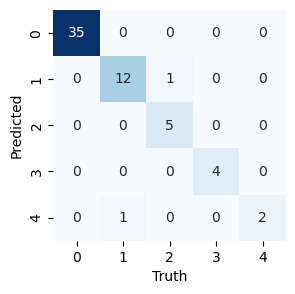

In [131]:
plot_confmatrix(conf_mat)

## 4 Classification Report

In [132]:
# 1 Class Imbalance

# 2 Recall
#                    terrorist correctly  identified
#---------------------------------------------------------------------------- or (TP/TP+FN)
#terrorist correctly identified + terrorist incorectly label as not terrorist

# 3 Precision
#                    terrorist correctly  identified
#---------------------------------------------------------------------------- or (TP/TP+FP)
#terrorist correctly identified + innocent label as terrorist

# F1
#combination of Precision and recall

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_proba_positive))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      0.92      0.92        13
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3

    accuracy                           0.97        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.97      0.97      0.97        60



# Regression model evaluation metrics
# 1 R^2
## compare your model prediction to the mean for your target
# 2 Mean Absolute Error (MAE)
# 3 Mean Squared Error (MSE)

# R^2

In [134]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

X = df_housing.drop('target',axis=1)
y = df_housing['target']

# Split into test and Train
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20)

# Instatiate RandomForestRegressor model
df_housing = RandomForestRegressor().fit(X_train,y_train)

df_housing.score(X_test,y_test)
#### Maximize R^2

0.8069911860615194

In [135]:
# MAE : is the average of the absolute(plus) difference between predicted and actual

In [136]:
# MAE
from sklearn.metrics import mean_absolute_error

y_predicted = df_housing.predict(X_test)

mae = mean_absolute_error(y_test,y_predicted)
mae

np.float64(0.32635206574612424)

In [137]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values':y_predicted})
df['difference'] = df['actual values'] -df['predicted values']
df
# How Wrong our Model is
# Minimize this Value

,actual values,predicted values,difference
4712,3.550,3.547111,0.002889
2151,0.707,0.631910,0.075090
15927,2.294,2.350450,-0.056450
82,1.125,1.287400,-0.162400
8161,2.254,2.889330,-0.635330
...,...,...,...
2319,0.682,0.715010,-0.033010
5341,2.250,2.680600,-0.430600
16888,3.500,2.666110,0.833890
6823,2.273,2.234150,0.038850


# Mean Squared Error

In [138]:
from sklearn.metrics import mean_squared_error

y_preds = df_housing.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

np.float64(0.2531678939698254)

In [139]:
# Manually calculate
mse_manual =sqroot = np.square(df['difference'])
mse_manual.mean()


np.float64(0.2531678939698254)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
np.random.seed(7)
# Create data
X = heart_disease.drop('num',axis=1)
y = heart_disease['num']


categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']  
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

clf = RandomForestClassifier()
cross_acc =cross_val_score(clf,X,y,cv=5,scoring=None)
cross_acc.mean()

np.float64(0.5887005649717515)

In [141]:
#accuracy 
cross_acc =cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cross_acc.mean()

np.float64(0.5583615819209039)

In [142]:
#recall
cross_acc =cross_val_score(clf,X,y,cv=5,scoring='recall_micro')
cross_acc.mean()

np.float64(0.5820338983050848)

In [143]:
#F1
cross_acc =cross_val_score(clf,X,y,cv=5,scoring='f1_micro')
cross_acc.mean()

np.float64(0.571864406779661)

In [146]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['target'] = housing.target


In [148]:
# For Regresson Problem

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(2)


X = df_housing.drop('target',axis=1)
y = df_housing['target']


clf = RandomForestRegressor()
cross_acc =cross_val_score(clf,X,y,cv=5,scoring=None)
cross_acc.mean()

np.float64(0.6506368990867343)

In [149]:
np.random.seed(7)
cv_r2 =cross_val_score(clf,X,y,cv=5,scoring=None)
cv_r2.mean()

np.float64(0.649893169707131)

In [153]:
# Mean Absolute Eroor
np.random.seed(7)
cv_r2 =cross_val_score(clf,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_r2

array([-0.54711073, -0.41150048, -0.44054168, -0.46712784, -0.47211994])

In [152]:
# Mean Squared Error 
np.random.seed(7)
cv_r2 =cross_val_score(clf,X,y,cv=5,scoring='neg_mean_squared_error')
cv_r2

array([-0.52946811, -0.35046694, -0.37601894, -0.44490437, -0.46287041])

In [164]:
# Root mse
np.random.seed(7)
cv_r2 =cross_val_score(clf,X,y,cv=5,scoring='neg_root_mean_squared_error')
cv_r2


array([-0.72764559, -0.59200248, -0.61320384, -0.66701152, -0.6803458 ])

In [165]:
#median absolute error
np.random.seed(7)
cv_r2 = cross_val_score(clf,X,y,cv=5,scoring='neg_median_absolute_error')
cv_r2

array([-0.4164751 , -0.2863051 , -0.3192048 , -0.32813445, -0.315725  ])